# Exercise 5: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
      - elizerimage1.jpg
      ...
    - Eliza
      - elizaimage1.jpg
      ...
    - Elijah
      - elijahimage1.jpg
      ...
  - Test
    - testimage1.jpg
    ...
```

- Upload 190 images of your self (selfied are recommended) in the Train folder
- Upload 190 images of your partner in the Train folder
- Upload 10 images each of yourself and your partner in the Test Folder (30 images total for each member)
- Use **.png** or **.jpg** or **.jpeg** images files

In [1]:
pip install numpy opencv-python scikit-learn

## Import libraries

In [2]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

## Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## 1. Display one raw image directly from your drive

In [4]:
def displayImage(image_path):
  image = Image.open(image_path)
  plt.imshow(image)
  plt.axis('on')
  plt.show()

## 2. Load the images from your drive and apply preprocessing to your raw images

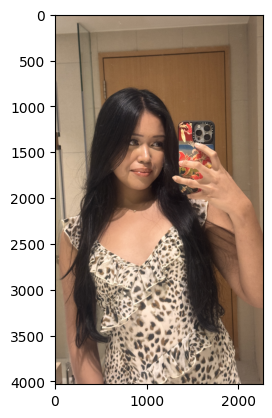

In [5]:
displayImage('/content/drive/My Drive/Images/Train/Queen Maegan Pedido/maeganimage103.JPG')

## 3. Display one pre-processed image from the training set

In [13]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        person_name = os.path.basename(person_folder)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            if img is None:
                print(f"Skipping file: {img_path}")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (100, 100))
            images.append(img.flatten())
            labels.append(person_name)
    return np.array(images), np.array(labels)


In [14]:
images, labels = load_images_from_folder('/content/drive/My Drive/Images/Train')
images.shape
labels.shape
labels

Skipping file: /content/drive/My Drive/Images/Train/James Adrian Castro/Selfie


array(['James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Ca

In [16]:
images, labels = load_images_from_folder('/content/drive/My Drive/Images/Train')

Skipping file: /content/drive/My Drive/Images/Train/James Adrian Castro/Selfie


In [15]:
images.shape

(792, 10000)

In [17]:
labels.shape

(792,)

In [18]:
labels

array(['James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Castro',
       'James Adrian Castro', 'James Adrian Ca

## 4. Display ten pre-processed images from the training set

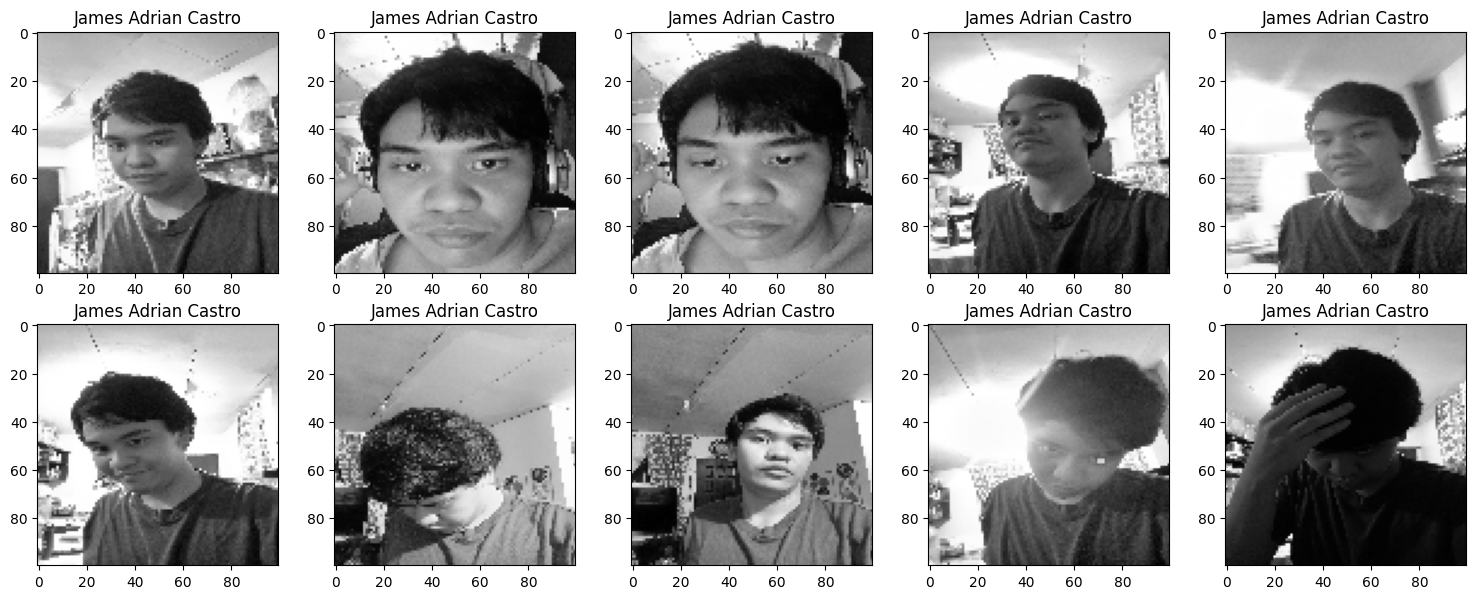

In [19]:
num_faces = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i in range(num_faces):
    image = images[i].reshape(100,100)
    name = labels[i]

    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(name)
    axes[i].axis('on')

plt.tight_layout()
plt.show()

## 5. Split your training data

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## 6. Train your SVM model

In [21]:
from sklearn import svm

model = svm.SVC(gamma='scale')
model.fit(X_train, y_train)

SVC()

## 7. Evaluate your SVM model

In [22]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 86.79%


## 8. Test your model using images not in your training set

Use your SVM model to predict the label of all of your images in the Test folder

In [23]:
def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)
    prediction = model.predict(img)
    return prediction

Predicted label: ['Queen Maegan Pedido']


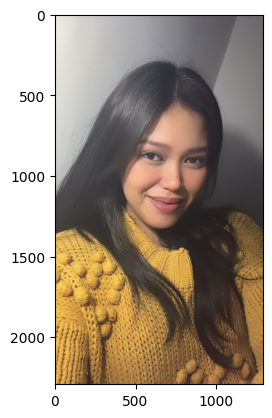

In [33]:
img_path = '/content/drive/My Drive/Images/Test/testimage22.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Moira Mercado']


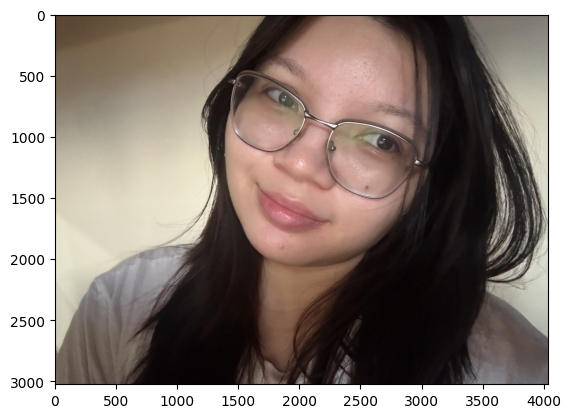

In [36]:
img_path = '/content/drive/My Drive/Images/Test/testimage39.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Jay Arre Talosig']


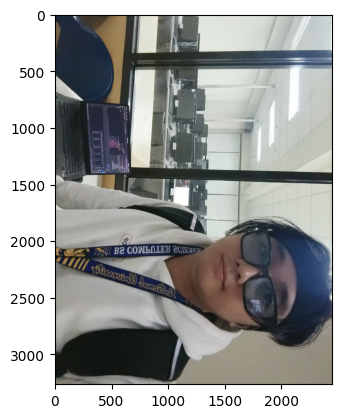

In [31]:
img_path = '/content/drive/My Drive/Images/Test/testimage3.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['James Adrian Castro']


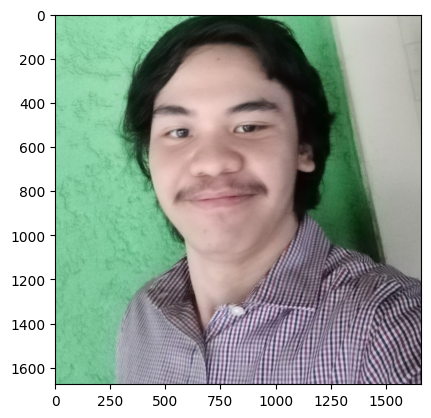

In [37]:
img_path = '/content/drive/My Drive/Images/Test/testimage 13.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Moira Mercado']


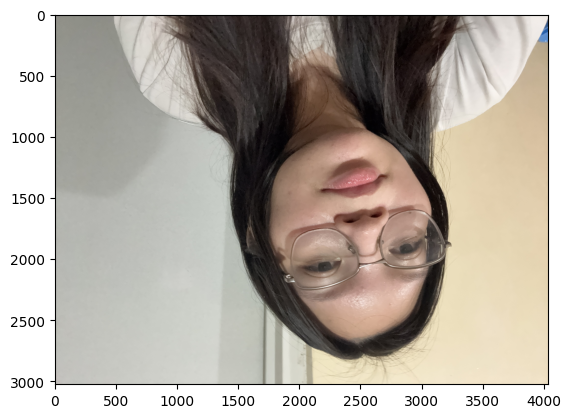

In [38]:
img_path = '/content/drive/My Drive/Images/Test/testimage40.JPG'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)